<a href="https://colab.research.google.com/github/TS0713/100-Days-ComputerVision/blob/main/Keras_MNIST_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os 
os.getcwd()
path = "/content/drive/MyDrive/Datasets"
os.chdir(path)
# !pip install idx2numpy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [12]:
data_path = path+"/MNIST_dataset/"
train_x = idx2numpy.convert_from_file(data_path+"train-images.idx3-ubyte")
train_x  = train_x.reshape(*train_x.shape,1) # 60000, 28, 28
train_y = idx2numpy.convert_from_file(data_path+"train-labels.idx1-ubyte")
train_y = to_categorical(train_y)
test_x = idx2numpy.convert_from_file(data_path+"t10k-images.idx3-ubyte")
test_x = test_x.reshape(*test_x.shape,1) # 60000, 28, 28
test_y = idx2numpy.convert_from_file(data_path+"t10k-labels.idx1-ubyte")
test_y = to_categorical(test_y)

In [23]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [25]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=20,batch_size=64,verbose=0)

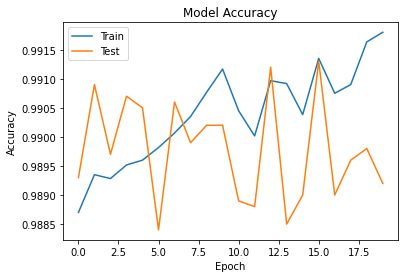

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

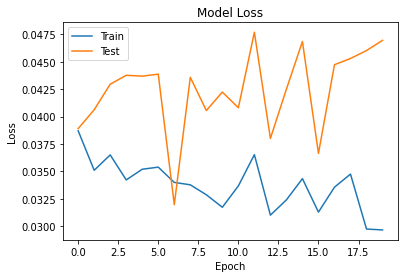

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()